# Basemap Plots

In [1]:
# Import modules
from    mpl_toolkits.basemap import Basemap
import  matplotlib.pyplot as plt
import  numpy  as np
import  warnings 
import  matplotlib.cbook

## Make simple map of continents    

In [2]:
fig = plt.figure (num=None, figsize = (15,10) )
map = Basemap (projection='merc', 
               llcrnrlat= -80, urcrnrlat = 80,
               llcrnrlon= -180, urcrnrlon = 180,
               resolution = 'c')
map.drawcoastlines(linewidth=1)
plt.title ("Mercator Porjection")

plt.show()
                                 

## Draw Parallels and meridians

In [3]:
fig = plt.figure (num=None, figsize = (15,10) )
map = Basemap (projection='merc', 
               llcrnrlat= -80, urcrnrlat = 80,
               llcrnrlon= -180, urcrnrlon = 180,
               resolution = 'c')
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='lightgreen', lake_color='lightblue')

parallels = np.arange (-90.0, 90.0, 30.0)
meridians = np.arange (-180, 181, 60.0)
map.drawparallels (parallels, labels = [True, True, False, False], dashes = [2,2])
map.drawmeridians (meridians, labels = [False, False, False, True], dashes= [2,2])
map.drawmapboundary (fill_color= '#009fe1')
plt.title ("Mercator Porjection with Parallels and Meridians")
plt.show()


## Mollweide projection

In [7]:
fig = plt.figure (num=None, figsize = (15,10) )
map = Basemap (projection='moll', 
               lon_0=0,
               resolution = 'c')
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='lightgreen', lake_color='lightblue')

parallels = np.arange (-90.0, 90.0, 30.0)
meridians = np.arange (-180.0, 181.0, 60.0)
map.drawparallels (parallels, labels = [True, True, False, False], dashes = [2,2])
map.drawmeridians (meridians, labels = [False, False, False, True], dashes= [2,2])
map.drawmapboundary (fill_color= '#009fe1')
plt.title ("Mollweide Porjection with Parallels and Meridians")
plt.show()

## Map with country, state borders and Rivers

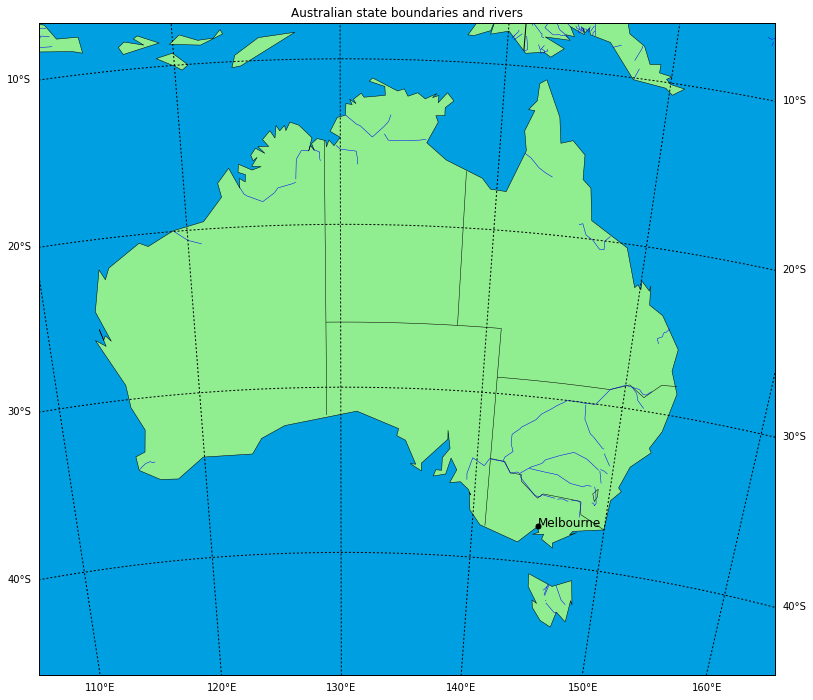

In [8]:
fig = plt.figure (num=None, figsize = (18,12) )

ozMinLat = -45.5   #-43.575
ozMinLon = 105.0   #112.925
ozMaxLat = -5.5    #-10.075
ozMaxLon = 155.5   #153.575

centerLat = 0.5 * (ozMinLat + ozMaxLat)
centerLon = 0.5 * (ozMinLon + ozMaxLon)

# REF
# Basemap of Australia 
# https://gis.stackexchange.com/questions/67764/forcing-lat-lon-bounding-box-to-appear-on-lcc-projection-map-in-matplotlib-basem


map = Basemap (projection= 'lcc', 
               #width=6_000_000, height= 4_500_000,
               #lat_1 = 50.0, lat_2=90.0, lon_0=145.0, lat_0=-35.0,
               llcrnrlon=ozMinLon, llcrnrlat=ozMinLat, 
               urcrnrlon=ozMaxLon, urcrnrlat= ozMaxLat,
               lat_0=centerLat, lon_0=centerLon,
               resolution = 'c'
               #resolution=None
              )
map.drawcoastlines(linewidth=0.5)
map.fillcontinents(color='lightgreen', lake_color='lightblue')

parallels = np.arange (-90.0, 90.0, 10.0)
meridians = np.arange (-180, 181, 10.0)
map.drawparallels (parallels, labels = [True, True, False, False], dashes = [2,2])
map.drawmeridians (meridians, labels = [False, False, False, True], dashes= [2,2])

map.drawmapboundary (fill_color= '#009fe1')
map.drawcountries (linewidth=1)
map.drawstates (linewidth=0.5)
map.drawrivers (linewidth=0.5, color='blue')



x, y = map(+144.9631, -37.8136)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Melbourne', fontsize=12)

plt.title ("Australian state boundaries and rivers")
plt.show()

## Top 20 Australian cities by population

In [9]:
from    geopy.geocoders import Nominatim
from    matplotlib.pyplot import cm
import  math
import  numpy as np
import  random
import  colorsys

In [10]:
fig = plt.figure (num=None, figsize = (18,12) )

ozMinLat = -45.5   
ozMinLon = 105.0   
ozMaxLat = -5.5    
ozMaxLon = 155.5   

centerLat = 0.5 * (ozMinLat + ozMaxLat)
centerLon = 0.5 * (ozMinLon + ozMaxLon)

map = Basemap (projection= 'lcc', 
               llcrnrlon=ozMinLon, llcrnrlat=ozMinLat, 
               urcrnrlon=ozMaxLon, urcrnrlat= ozMaxLat,
               lat_0=centerLat, lon_0=centerLon,
               resolution = 'c'
               #resolution = None
              )

map.drawcountries (linewidth=2)
map.drawstates (linewidth=1)
map.shadedrelief(scale=0.5)
geolocator = Nominatim(user_agent="http") 

cities = [["Melbourne", 4_969_305 ,1,0 ],
          ["Sydney", 4_966_806 ,-1,1], 
          ["Brisbane", 2_475_680 ,1,0 ],
          ["Perth", 2_083_645 ,-1,0 ],
          ["Adelaide", 1_357_504 ,1,1 ], 
          ["Gold Coast", 709_495 ,1,-1 ],
          ["Newcastle, NSW", 498_015 ,1,0 ],
          ["Canberra-Queanbeyan", 464_995 ,-1,1 ],
          ["Sunshine Coast", 348_343 ,1,1 ],
          ["Central Coast", 337_284 ,1,-1 ],
          ["Wollongong", 309_345 ,1,-1 ],
          ["Geelong", 282_412 ,-1,0 ],
          ["Hobart", 219_071 ,1,1 ],
          ["Townsville", 183_322 ,1,0 ],
          ["Cairns",  155_340 ,1,0 ],
          ["Toowoomba", 139_526 ,-1,1 ],
          ["Darwin", 133_268 ,1,1 ],
          ["Ballara", 109_533 ,-1,0 ],
          ["Bendigo", 102_499 ,-1,0 ],
          ["Albury–Wodonga", 96_075 ,1,-1 ] ]

scale = .0125

def hilo(a, b, c):
    if c < b: b, c = c, b
    if b < a: a, b = b, a
    if c < b: b, c = c, b
    return a + c

def complement(r, g, b):
    k = hilo(r, g, b)
    return tuple(k - u for u in (r, g, b))    


def random_color():
        rand = lambda: random.randint(0, 100)
        a,b,c = rand(), rand(), rand()
        d,e,f = complement(a, b, c)
        return '#%02X%02X%02X' % (a, b, c), '#%02X%02X%02X' % (d, e, f)    

for (city, population, xdir, ydir) in cities:
      loc = geolocator.geocode(city)
      x, y = map(loc.longitude, loc.latitude)
      c, cc=random_color()
      map.plot(x,y,marker='o',color=c,markersize=int(math.sqrt(population))*scale)
 
      if xdir == -1:
           x = x + len (city) * xdir *47500 - 5000 *int(math.sqrt(population))*scale
      elif xdir==1:
           x = x + 50000 + 3000 *int(math.sqrt(population))*scale
            
      if ydir == -1:
           y = y - 40000  
      elif ydir == 1:
           y = y +  30000   
      
      t = plt.text(x, y, city, fontsize=11, color=c)  
      t.set_bbox(dict(facecolor=cc, alpha=0.25, edgecolor=c))

plt.show()

#REF
# Correct way to use GeoPy Nominatim
# https://stackoverflow.com/questions/52600278/correct-way-to-use-geopy-nominatim
# How to pick a new color for each plotted line within a figure in matplotlib?
# https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
# Get a Bright Random Colour Python
# https://stackoverflow.com/questions/43437309/get-a-bright-random-colour-python
# complementary colour of a rgb code?
# https://stackoverflow.com/questions/40233986/python-is-there-a-function-or-formula-to-find-the-complementary-colour-of-a-rgb
# Get lat-long of US cities and plot them on a map using matplotlib and basemap
# https://gis.stackexchange.com/questions/198530/get-lat-long-of-us-cities-and-plot-them-on-a-map-using-matplotlib-and-basemap